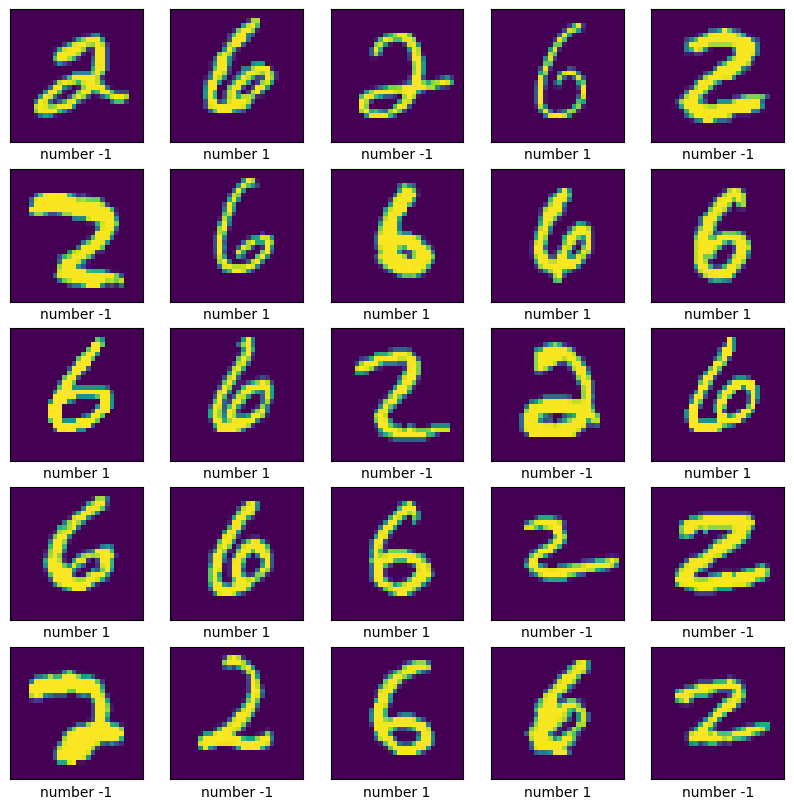

Training data shape: (1000, 785)
Test data shape: (1990, 785)

Problem 1: Perceptron
Stopping at 95% training accuracy:
  - Final Training Error: 1.00 %
  - Final Test Error:     2.96 %
  - Epochs needed:        2

Stopping at 80% training accuracy:
  - Final Training Error: 3.30 %
  - Final Test Error:     4.57 %
  - Epochs needed:        1



In [ ]:
#Importing packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
# Choose pictures of number 2 and number 6
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
index_train = np.where((train_labels == 2) | (train_labels == 6))
index_test = np.where((test_labels == 2) | (test_labels == 6))

train_images_26 = train_images[index_train]
train_images_26 = train_images_26.reshape((len(train_images_26), train_images_26[1].size))

train_labels_26 = train_labels[index_train].astype('int')
test_images_26 = test_images[index_test]
test_images_26 = test_images_26.reshape((len(test_images_26), test_images_26[1].size))
test_labels_26 = test_labels[index_test].astype('int')


# Change labels from {2, 6} to {-1, 1}
# Label for number 2: -1; Label for number 6: +1
train_labels_26[np.where(train_labels_26 == 2)] = -1
train_labels_26[np.where(train_labels_26 == 6)] = 1
test_labels_26[np.where(test_labels_26 == 2)] = -1
test_labels_26[np.where(test_labels_26 == 6)] = 1

#show the first 25 training data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_26[i].reshape((28,28)),)
    plt.xlabel('number '+str(train_labels_26[i]))
plt.show()

# Append dummy feature and normalize data
train_images_26_w_dummy = np.insert(train_images_26, 784, 1, axis=1) / 255
test_images_26_w_dummy = np.insert(test_images_26, 784, 1, axis=1) / 255

# Choose a subset of 1000 for the training dataset
X_train = train_images_26_w_dummy[range(1000)]
y_train = train_labels_26[range(1000)]
X_test = test_images_26_w_dummy
y_test = test_labels_26

#Checking the dimension, the feature vector of each sample
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}\n")


# This function calculates the accuracy of predictions.
def calculate_accuracy(y_true, y_pred):

    return np.mean(y_true == y_pred)

def train_perceptron(X_train, y_train, X_test, y_test, alpha, stop_accuracy):

    # Initialize weight vector 'w' as an all-zero vector
    n_features = X_train.shape[1]
    w = np.zeros(n_features)
    epochs = 0
    max_epochs = 200 # Using max epochs as safety break to prevent infinite loops

    while epochs < max_epochs:
        epochs += 1
        # Shuffle data for each epoch
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_shuffled, y_shuffled = X_train[indices], y_train[indices]

        # Iterate through each training sample
        for xi, yi in zip(X_shuffled, y_shuffled):
            score = np.dot(w, xi)
            # Check for misclassification and update
            if yi * score <= 0:        #checking for the condition (wT)(xi)(yi)<=0
                w = w + alpha * yi * xi

        # Check stopping criterion after each epoch
        train_preds = np.sign(np.dot(X_train, w))
        train_preds[train_preds == 0] = 1 # Handle the case where dot product is zero
        current_train_accuracy = calculate_accuracy(y_train, train_preds)

        if current_train_accuracy >= stop_accuracy:
            break

    # Evaluate final model
    test_preds = np.sign(np.dot(X_test, w))
    test_preds[test_preds == 0] = 1  # Replace 0 with +1 so predictions are only -1 or +1.
    test_accuracy = calculate_accuracy(y_test, test_preds)

    training_error = 1.0 - current_train_accuracy
    test_error = 1.0 - test_accuracy

    return training_error, test_error, epochs

print("Problem 1: Perceptron")
# Parameters from the assignment
alpha = 0.15

# Part a: Stop at 95% training accuracy
train_err_95, test_err_95, epochs_95 = train_perceptron(X_train, y_train, X_test, y_test, alpha, 0.95)
print(f"Stopping at 95% training accuracy:")
print(f"  - Final Training Error: {train_err_95*100:.2f} %")
print(f"  - Final Test Error:     {test_err_95*100:.2f} %")
print(f"  - Epochs needed:        {epochs_95}\n")

# Part b: Stop at 80% training accuracy
train_err_80, test_err_80, epochs_80 = train_perceptron(X_train, y_train, X_test, y_test, alpha, 0.80)
print(f"Stopping at 80% training accuracy:")
print(f"  - Final Training Error: {train_err_80*100:.2f} %")
print(f"  - Final Test Error:     {test_err_80*100:.2f} %")
print(f"  - Epochs needed:        {epochs_80}\n")



### Expalanation of Results:
 The code implements the Perceptron algorithm and observe how different stopping criteria affect the model's performance on the MNIST 2-vs-6 digit classification task. The model was trained on a subset of 1000 images and evaluated on a separate test set of 1990 images. Two experiments were run: one stopping when training accuracy reached 80%, and another at 95%.

### Analysis of the results:
The results clearly shows that the amount of training significantly impacts the model's ability to generalize to new, unseen data.

- Part 1 (Stopping at 95% Training Accuracy) :

This model trained for 2 epochs to meet its stricter goal. It achieved a very low final training error of 1.00% and, more importantly, a low test error of 2.96%. This indicates that the model learned the underlying patterns in the training data effectively and was able to generalize well to the test set.

- Part 2 (Stopping at 80% Training Accuracy) :

This model trained for only 1 epoch. Because it had a more lenient goal, it stopped learning very early. While it was faster, its final test error was significantly higher at 4.57%. This is an example of undertraining, where the learning process is halted before the model can find an effective decision boundary.

### Conclusion
The comparison between the two stopping criteria is following: the stricter stopping criterion produced a better model. The model trained to 95% accuracy had a test error that was  lower than the model trained to only 80% accuracy (2.96% vs 4.57%). This demonstrates that for this classification problem, allowing the Perceptron algorithm to train for more epochs results in a more accurate and robust classifier.

In [ ]:
from scipy.stats import mode

# This function calculates the accuracy of predictions.
def calculate_accuracy(y_true, y_pred):

    return np.mean(y_true == y_pred)

# defining the function to make predictions using the k-NN algorithm.
def knn_predict(X_train, y_train, X_test, k):

    predictions = []
    for xt in X_test:

    #The constant “bias” feature of 1 was appended to both train and test data
    #this bias dimension contributes zero to distances (1–1=0),
    #so it doesn’t effect k-NN.

        # Calculate Euclidean distances from the test point to all training points
        distances = np.linalg.norm(X_train - xt, axis=1)

        # Get the indices of the k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Get the labels of these neighbors
        k_nearest_labels = y_train[k_nearest_indices]

        # Predict by majority vote
        prediction_result, _ = mode(k_nearest_labels)
        final_prediction = np.array(prediction_result).flatten()[0]
        predictions.append(final_prediction)

    return np.array(predictions)

print("--- Problem 2: k-Nearest Neighbor ---")
# k values specified in the homework
k_values = [1, 3, 5, 7]

for k in k_values:

    print(f"Evaluating for k = {k}")

    # Calculate training error
    y_train_pred = knn_predict(X_train, y_train, X_train, k)
    train_accuracy = calculate_accuracy(y_train, y_train_pred)
    train_error = 1.0 - train_accuracy

    # Calculate test error
    y_test_pred = knn_predict(X_train, y_train, X_test, k)
    test_accuracy = calculate_accuracy(y_test, y_test_pred)
    test_error = 1.0 - test_accuracy

    print(f"  - Training Error: {train_error *100:.2f} %")
    print(f"  - Test Error:     {test_error *100:.2f} %")

--- Problem 2: k-Nearest Neighbor ---
Evaluating for k = 1
  - Training Error: 0.00 %
  - Test Error:     0.75 %
Evaluating for k = 3
  - Training Error: 0.20 %
  - Test Error:     0.60 %
Evaluating for k = 5
  - Training Error: 0.60 %
  - Test Error:     0.70 %
Evaluating for k = 7
  - Training Error: 0.60 %
  - Test Error:     0.85 %


 The choice of k in the k-Nearest Neighbor algorithm affects model performance. The algorithm was evaluated for k = 1, 3, 5, and 7.
 The implementation used the Euclidean distance metric and majority voting to classify new data points.

 ### Effect of K on Training and Test Error

The results show how model complexity, controlled by k, creates a trade-off between fitting the training data and generalizing to new data.

 - k=1(High Complexity & Overfitting): At k=1, the model achieved a perfect Training Error of 0.00% . This is expected, as each training point is its own nearest neighbor and will always classify itself correctly. This represents a perfect memorization of the training data.
 However, the Prediction Error on the test set was 0.75%. While the model perfectly memorized the training data, its high complexity caused it to overfit. It learned the noise in the training set, not just the underlying pattern, which weaken its ability to generalize and its performance on the test set.


- k=3(Optimal Balance):
At k=3, the model achieved the lowest Prediction Error of 0.60%. This represents the optimal balance for this dataset. The decision boundary is smoother than at k=1, making it more robust to noise while still being flexible enough to capture the underlying pattern of the data.

- k=5 and k=7(Lower Complexity & Underfitting):
As k increased to 5 and 7, both the Training Error and Prediction Error began to rise. A larger k creates a much smoother decision boundary. However, if the boundary becomes too smooth, the model becomes too simple and starts to underfit. It loses the ability to capture important local details, causing its performance on the test set to decline.

### Conclusion
The optimal model was found at k=3, which yielded the lowest error(0.60 %) on the unseen test data. The results clearly show that k must be chosen carefully to balance the model between the risk of overfitting (with a small k) and underfitting (with a large k).
